# Predict Delivery time 과제

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 구조 훑어보기

In [3]:
delivery = pd.read_csv('./predict_delivery_time.csv')
delivery.head(10)

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
0,ID6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30
1,ID2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30
2,ID1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65
3,ID5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30
4,ID6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65
5,ID5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150,50,3.8,46.0,18.0,30
6,ID3777,Mumbai Central,"Beverages, Fast Food",150,50,3.7,108.0,31.0,30
7,ID745,Delhi UniversityGTB Nagar,"Chinese, Thai, Asian",650,50,4.0,1731.0,1235.0,45
8,ID2970,Delhi UniversityGTB Nagar,"Mithai, Street Food",100,50,3.9,110.0,26.0,30
9,ID3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562.0,294.0,65


In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    11094 non-null  object 
 1   Location      11094 non-null  object 
 2   Cuisines      11094 non-null  object 
 3   AverageCost   11094 non-null  object 
 4   MinimumOrder  11094 non-null  int64  
 5   Rating        9903 non-null   object 
 6   Votes         9020 non-null   float64
 7   Reviews       8782 non-null   float64
 8   DeliveryTime  11094 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 780.2+ KB


In [40]:
# AverageCost column에 '1,000'이라는 string 값이 있어서 ,를 제거해주는 작업

delivery['AverageCost'].str.contains(',')
delivery['AverageCost'] = delivery['AverageCost'].apply(lambda x: x.replace(',', ''))
delivery['AverageCost'].str.contains(',').value_counts()

False    11094
Name: AverageCost, dtype: int64

In [48]:
# AverageCost column에 'for'이라는 string값이 있어서 100이라는 값으로 변경해주는 작업

delivery[(delivery['Cuisines'].str.contains('Fast Food')==True)&(delivery['MinimumOrder']==50)]
delivery['AverageCost'] = delivery['AverageCost'].apply(lambda x: x.replace('for', '100'))

In [52]:
delivery['AverageCost'] = pd.to_numeric(delivery['AverageCost'])

In [53]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    11094 non-null  object 
 1   Location      11094 non-null  object 
 2   Cuisines      11094 non-null  object 
 3   AverageCost   11094 non-null  int64  
 4   MinimumOrder  11094 non-null  int64  
 5   Rating        9903 non-null   object 
 6   Votes         9020 non-null   float64
 7   Reviews       8782 non-null   float64
 8   DeliveryTime  11094 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 780.2+ KB


In [6]:
delivery['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
DBlock, Sector 63, Noida                            806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi UniversityGTB Nagar                           545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

In [7]:
delivery['Cuisines'].value_counts()

North Indian                                        850
North Indian, Chinese                               614
Fast Food                                           434
South Indian                                        270
Chinese                                             245
                                                   ... 
Cafe, Chinese, Continental                            1
North Indian, Chinese, Street Food, South Indian      1
Coffee, Beverages                                     1
Lucknowi, North Indian                                1
Fast Food, Chinese, South Indian, Rolls               1
Name: Cuisines, Length: 2179, dtype: int64

In [54]:
delivery.describe()

,AverageCost,MinimumOrder,Votes,Reviews,DeliveryTime
count,11094.000000,11094.000000,9020.000000,8782.000000,11094.000000
mean,202.699657,53.344511,244.544457,123.247893,37.056066
std,129.836921,18.551245,555.094733,321.025216,12.447496
min,50.000000,0.000000,3.000000,1.000000,10.000000
25%,100.000000,50.000000,19.000000,7.000000,30.000000
50%,200.000000,50.000000,63.000000,26.000000,30.000000
75%,200.000000,50.000000,216.000000,91.000000,45.000000
max,2050.000000,500.000000,9054.000000,6504.000000,120.000000


In [62]:
delivery.corr()

,AverageCost,MinimumOrder,Votes,Reviews,DeliveryTime
AverageCost,1.000000,0.117167,0.453043,0.469711,0.175211
MinimumOrder,0.117167,1.000000,0.123629,0.121289,0.254186
Votes,0.453043,0.123629,1.000000,0.964191,0.198534
Reviews,0.469711,0.121289,0.964191,1.000000,0.170745
DeliveryTime,0.175211,0.254186,0.198534,0.170745,1.000000


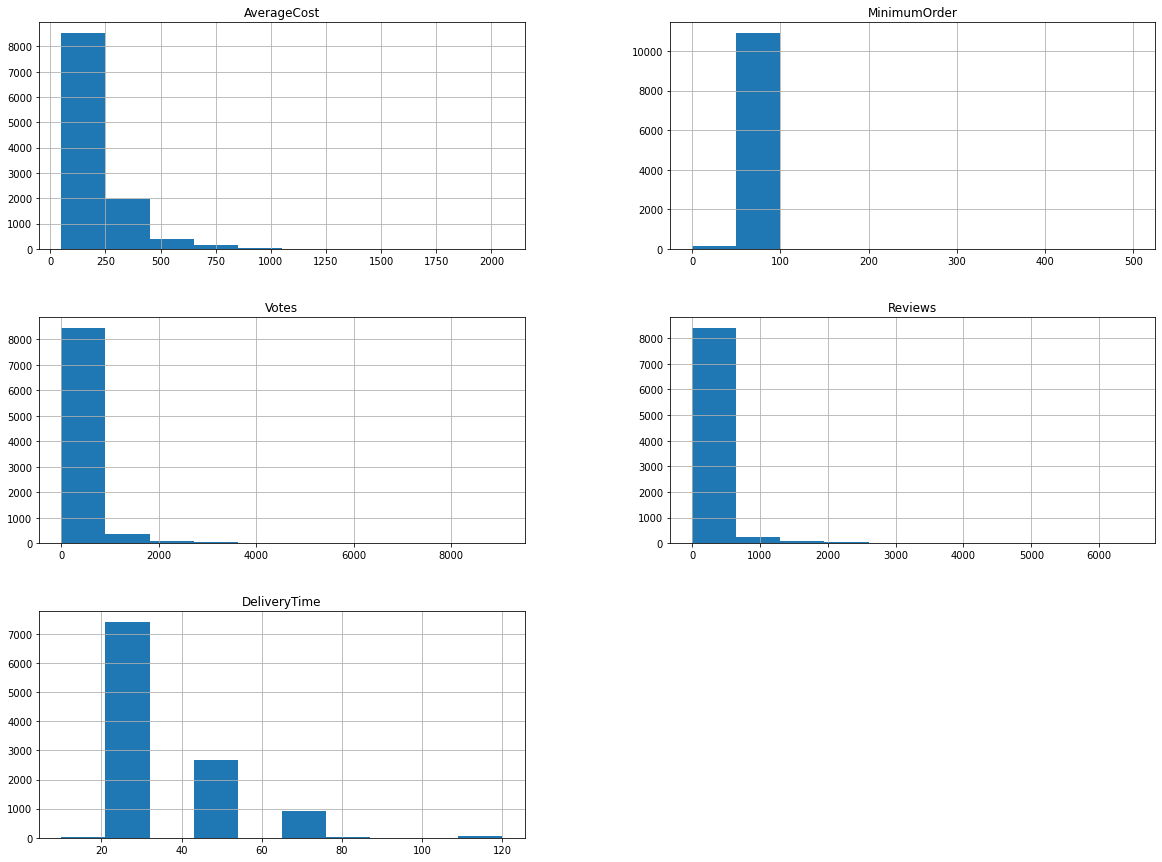

In [55]:
delivery.hist(figsize=(20,15))
plt.show()

## 테스트 데이터셋 만들기

In [58]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(delivery, test_size=0.2, random_state=42)

In [59]:
train_set

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
11025,ID304,"Rmz Centennial, I Gate, Whitefield","North Indian, Andhra, BBQ, Seafood, Chinese",350,50,3.8,160.0,73.0,45
1684,ID4157,"FTI College, Law College Road, Pune","European, Italian, Continental, Salad, Beverages",600,50,4.0,646.0,370.0,45
499,ID2772,"Sector 63A,Gurgaon","Chinese, Continental, Italian, Healthy Food, A...",200,50,3.1,41.0,25.0,45
5770,ID1834,"FTI College, Law College Road, Pune","Bakery, Cafe, Desserts",100,50,4.0,231.0,123.0,45
8290,ID3496,"Mico Layout, Stage 2, BTM Layout,Bangalore","Chinese, North Indian",150,50,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
5734,ID6122,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, South Indian, Chinese",200,50,3.8,116.0,36.0,65
5191,ID7184,"Chandni Chowk, Kolkata","Fast Food, Healthy Food, Sandwich, Salad",200,50,3.7,132.0,52.0,30
5390,ID7993,"Delhi Administration Flats, Timarpur","Bakery, Desserts",200,50,3.1,5.0,3.0,30
860,ID6852,Majestic,"South Indian, Chinese, North Indian",200,50,3.4,9.0,2.0,30


## 데이터 이해를 위한 탐색과 시각화

In [108]:
# 학습용 데이터 복사본 만들기
train_df = train_set.copy()

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8875 entries, 11025 to 7270
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    8875 non-null   object 
 1   Location      8875 non-null   object 
 2   Cuisines      8875 non-null   object 
 3   AverageCost   8875 non-null   int64  
 4   MinimumOrder  8875 non-null   int64  
 5   Rating        7919 non-null   object 
 6   Votes         7237 non-null   float64
 7   Reviews       7051 non-null   float64
 8   DeliveryTime  8875 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 693.4+ KB


In [110]:
corr_matrix = train_df.corr()
corr_matrix['DeliveryTime'].sort_values(ascending=False)

DeliveryTime    1.000000
MinimumOrder    0.257467
Votes           0.211054
Reviews         0.185067
AverageCost     0.182461
Name: DeliveryTime, dtype: float64

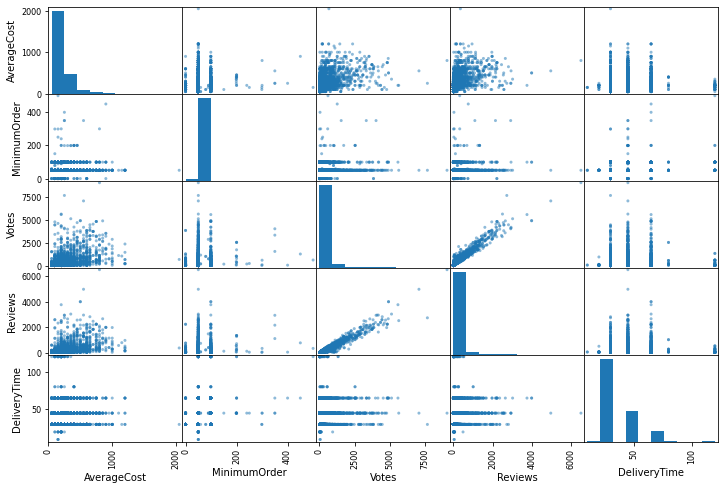

In [111]:
attributes = ['AverageCost', 'MinimumOrder', 'Votes', 'Reviews', 'Rating', 'DeliveryTime']
pd.plotting.scatter_matrix(train_df[attributes], figsize=(12,8))
plt.show()

In [112]:
train_df.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating           956
Votes           1638
Reviews         1824
DeliveryTime       0
dtype: int64

In [113]:
train_num = train_df.copy()

In [114]:
def non_numerals(series):
    non_numerals =[]
    for i in series.unique():
        try:
            i = float(i)
        except:
            non_numerals.append(i)
    return non_numerals

non_numerals(train_num['Rating'])

['NEW', 'Opening Soon', 'Temporarily Closed']

In [115]:
train_num = train_num[(train_df['Rating']!='NEW')&(train_df['Rating']!='Opening Soon')&(train_df['Rating']!='Temporarily Closed')]
train_num

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
11025,ID304,"Rmz Centennial, I Gate, Whitefield","North Indian, Andhra, BBQ, Seafood, Chinese",350,50,3.8,160.0,73.0,45
1684,ID4157,"FTI College, Law College Road, Pune","European, Italian, Continental, Salad, Beverages",600,50,4.0,646.0,370.0,45
499,ID2772,"Sector 63A,Gurgaon","Chinese, Continental, Italian, Healthy Food, A...",200,50,3.1,41.0,25.0,45
5770,ID1834,"FTI College, Law College Road, Pune","Bakery, Cafe, Desserts",100,50,4.0,231.0,123.0,45
8290,ID3496,"Mico Layout, Stage 2, BTM Layout,Bangalore","Chinese, North Indian",150,50,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
5734,ID6122,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, South Indian, Chinese",200,50,3.8,116.0,36.0,65
5191,ID7184,"Chandni Chowk, Kolkata","Fast Food, Healthy Food, Sandwich, Salad",200,50,3.7,132.0,52.0,30
5390,ID7993,"Delhi Administration Flats, Timarpur","Bakery, Desserts",200,50,3.1,5.0,3.0,30
860,ID6852,Majestic,"South Indian, Chinese, North Indian",200,50,3.4,9.0,2.0,30


In [116]:
# Rating column에서 NaN과 string으로 되어있는 값을 채워주기 위해 중앙값 확인

train_num['Rating'] = pd.to_numeric(train_num['Rating'])
train_num.describe()

,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
count,8282.000000,8282.000000,7326.000000,7235.000000,7051.000000,8282.000000
mean,205.892297,53.648515,3.614060,243.503525,122.829102,37.608669
std,132.952254,19.226454,0.414204,544.328070,312.281975,12.842881
min,50.000000,0.000000,2.100000,4.000000,1.000000,10.000000
25%,150.000000,50.000000,3.300000,19.000000,8.000000,30.000000
50%,200.000000,50.000000,3.600000,63.000000,26.000000,30.000000
75%,200.000000,50.000000,3.900000,216.000000,90.500000,45.000000
max,2050.000000,500.000000,4.900000,9054.000000,6504.000000,120.000000


In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8875 entries, 11025 to 7270
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    8875 non-null   object 
 1   Location      8875 non-null   object 
 2   Cuisines      8875 non-null   object 
 3   AverageCost   8875 non-null   int64  
 4   MinimumOrder  8875 non-null   int64  
 5   Rating        7919 non-null   object 
 6   Votes         7237 non-null   float64
 7   Reviews       7051 non-null   float64
 8   DeliveryTime  8875 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 693.4+ KB


In [122]:
train_df['Rating'].fillna('3.6', inplace=True)
train_df.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating             0
Votes           1638
Reviews         1824
DeliveryTime       0
dtype: int64

In [142]:
train_df['Rating'] = train_df['Rating'].apply(lambda x: x.replace('NEW', '3.6'))
train_df['Rating'] = train_df['Rating'].apply(lambda x: x.replace('Opening Soon', '3.6'))
train_df['Rating'] = train_df['Rating'].apply(lambda x: x.replace('Temporarily Closed', '3.6'))

AttributeError: 'float' object has no attribute 'replace'

In [141]:
# train_df['Rating'] = train_df['Rating'].to_string()
def fill_rating(series):
    for i in series:
        if i == 'NEW':
            i.replace('NEW', '3.6')
        elif i == 'Opening Soon':
            i.replace('Opening Soon', '3.6')
        elif i == 'Temporarily Closed':
            i.replace('Temporarily Closed', '3.6')

fill_rating(train_df['Rating'])

In [140]:
train_df['Rating'].unique()

array(['3.8', '4.0', '3.1', 3.6, '3.6', '3.0', '3.5', '4.3', 'NEW', '4.1',
       '3.7', '2.8', '2.6', '3.4', '2.9', '3.2', '3.3', '3.9', '4.5',
       '2.7', '4.4', '4.2', '2.4', '4.7', '2.3', '4.8', 'Opening Soon',
       '4.6', '4.9', '2.5', '2.1', 'Temporarily Closed', '2.2'],
      dtype=object)

In [143]:
train_df['Rating'] = pd.to_numeric(train_df['Rating'])
train_df.describe()

ValueError: Unable to parse string "NEW" at position 11

In [96]:
train_df.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
AverageCost        0
MinimumOrder       0
Rating             0
Votes           1638
Reviews         1824
DeliveryTime       0
dtype: int64